# Linear Regression

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
x_train = np.array([2600,3000,3200,3600,4000]).reshape(-1, 1)
y_train = np.array([55000, 60000, 65000,70000,80000])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [[2600]
 [3000]
 [3200]
 [3600]
 [4000]]
y_train = [55000 60000 65000 70000 80000]


In [3]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 5


In [4]:
i=1
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = ([3000], 60000)


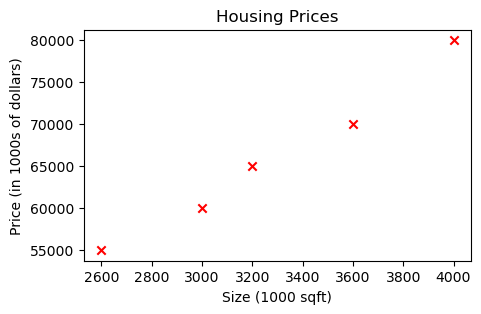

In [5]:
plt.figure(figsize=(5,3))
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()


In [6]:
reg= linear_model.LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [7]:
reg.coef_

array([17.6369863])

In [8]:
reg.intercept_

8150.684931506839

In [48]:
17.6369863*3200+8150.68

64589.03616

In [9]:
value = np.array([[3200]])  # Reshape scalar into a 2D array
prediction = reg.predict(value)
print("Prediction for 3300:", prediction)

Prediction for 3300: [64589.04109589]


## CSV to Linear Regression

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('homeprices.csv')

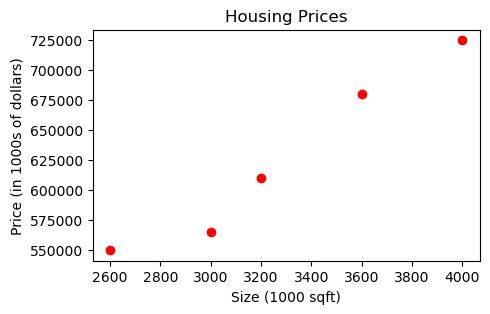

In [12]:
plt.figure(figsize=(5,3))
plt.scatter(df.area,df.price, color='red')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

In [13]:
reg2=linear_model.LinearRegression()
reg2.fit(df[['area']],df.price)


LinearRegression()

In [15]:
reg2.predict([[3300]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [16]:
d=pd.read_csv("areas.csv")

In [18]:
p=reg2.predict(d)


In [19]:
d['Price']=p
d.to_csv("prediction.csv",index=False)

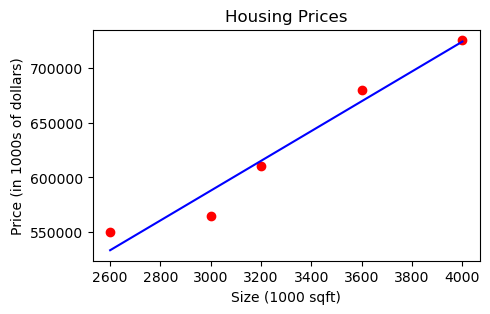

In [20]:
plt.figure(figsize=(5,3))
plt.scatter(df.area,df.price, color='red')
plt.plot(df.area,reg2.predict(df[['area']]),color='blue')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

### Saving models

In [21]:
import pickle

In [22]:
with open('model1_pickle','wb') as f:
    pickle.dump(reg,f)

In [26]:
with open('model1_pickle','rb') as f:
    mp=pickle.load(f)

mp.predict([[5000]])

array([96335.61643836])

### Saving models using joblib

In [34]:
import joblib

In [35]:
joblib.dump(reg2,'model2_joblib')

['model2_joblib']

In [36]:
#joblib.load('model2_joblib').predict([[5000]])
m2 = joblib.load('model2_joblib')
m2.predict([[5000]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [38]:
m2.coef_

array([135.78767123])

In [39]:
m2.intercept_

180616.43835616432